In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (20,10)

# Load Data as Data Frame #

In [168]:
#importing data as dataframe
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [169]:
#display shape of dataset (rows,columns)
df.shape

(13320, 9)

# Data Cleaning  (Null values) #

In [170]:
#drop unnecessary columns
df.drop(["availability","location","society"], axis=1, inplace = True)
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [171]:
#unique count for area_type
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

/Users/hamza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


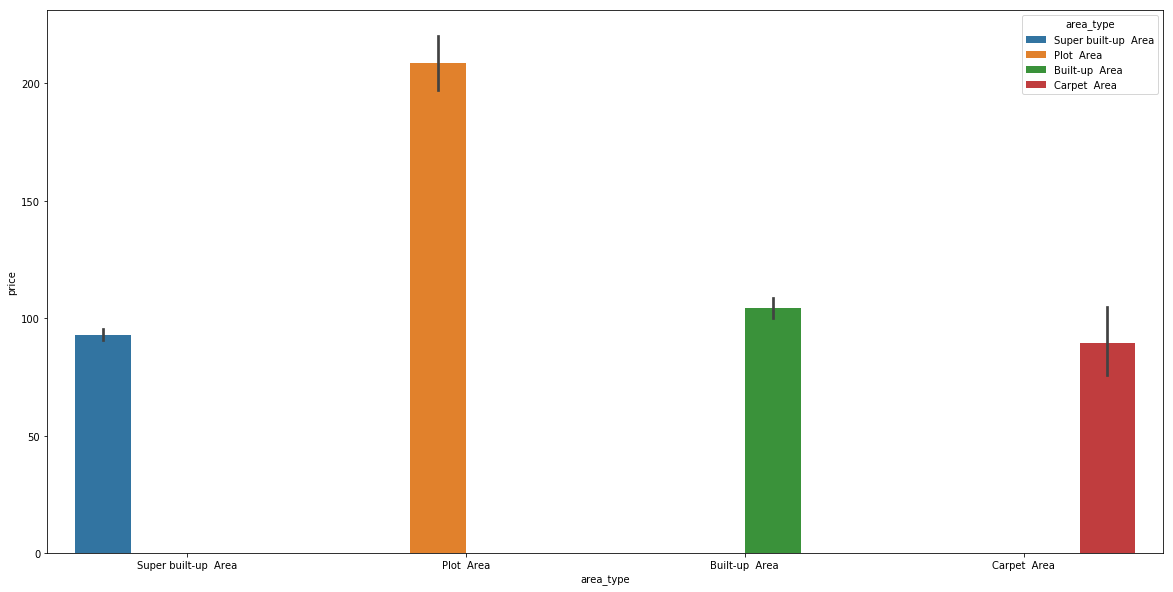

In [172]:
#plot price range for each area_type
sns.barplot(x="area_type", y="price", data=df, hue="area_type")

In [173]:
#check for null values
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [174]:
#new dataframe df1 with dropped all rows containing null values
df1 = df.dropna()
df1.shape

(12711, 6)

In [175]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [176]:
df1["bhk"]=df1["size"].apply(lambda x: int(x.split(" ")[0]))
df1.drop("size", axis =1, inplace =True)

/Users/hamza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hamza/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [177]:
df1.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1056,2.0,1.0,39.07,2
1,Plot Area,2600,5.0,3.0,120.00,4
2,Built-up Area,1440,2.0,3.0,62.00,3
3,Super built-up Area,1521,3.0,1.0,95.00,3
4,Super built-up Area,1200,2.0,1.0,51.00,2


### One Hot Encoding for area_type ###

In [178]:
dummy = pd.get_dummies(df1["area_type"])
dummy.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [179]:
df1 = pd.concat([df1,dummy], axis="columns")
df1.drop("area_type", axis=1, inplace=True)
df1.drop("Built-up  Area", axis=1, inplace=True)
df1.head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area
0,1056,2.0,1.0,39.07,2,0,0,1
1,2600,5.0,3.0,120.00,4,0,1,0
2,1440,2.0,3.0,62.00,3,0,0,0
3,1521,3.0,1.0,95.00,3,0,0,1
4,1200,2.0,1.0,51.00,2,0,0,1


# Data Cleaning (total_sqft) #

In [180]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [181]:
df1[~df1["total_sqft"].apply(is_float)].head(10)

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area
30,2100 - 2850,4.0,0.0,186.000,4,0,0,1
122,3067 - 8156,4.0,0.0,477.000,4,0,0,1
137,1042 - 1105,2.0,0.0,54.005,2,0,0,1
165,1145 - 1340,2.0,0.0,43.490,2,0,0,1
188,1015 - 1540,2.0,0.0,56.800,2,0,0,1
410,34.46Sq. Meter,1.0,0.0,18.500,1,0,0,1
549,1195 - 1440,2.0,0.0,63.770,2,0,0,1
661,1120 - 1145,2.0,0.0,48.130,2,0,0,1
672,3090 - 5002,4.0,0.0,445.000,4,0,0,0
772,1160 - 1195,2.0,0.0,59.935,2,0,0,1


In [182]:
def sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return float((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [183]:
sqft_to_num("2100 - 2850")

2475.0

In [184]:
df2 = df1.copy()

In [185]:
df2["total_sqft"]=df2["total_sqft"].apply(sqft_to_num)

In [186]:
df3= df2.dropna()

In [187]:
df3.shape

(12669, 8)

In [188]:
df4 = df3.copy()
df4["price_p_sqft"] = df4["price"]*100000/df4["total_sqft"]
df4.head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area,price_p_sqft
0,1056.0,2.0,1.0,39.07,2,0,0,1,3699.810606
1,2600.0,5.0,3.0,120.00,4,0,1,0,4615.384615
2,1440.0,2.0,3.0,62.00,3,0,0,0,4305.555556
3,1521.0,3.0,1.0,95.00,3,0,0,1,6245.890861
4,1200.0,2.0,1.0,51.00,2,0,0,1,4250.000000


# Box plot Features Visualization #

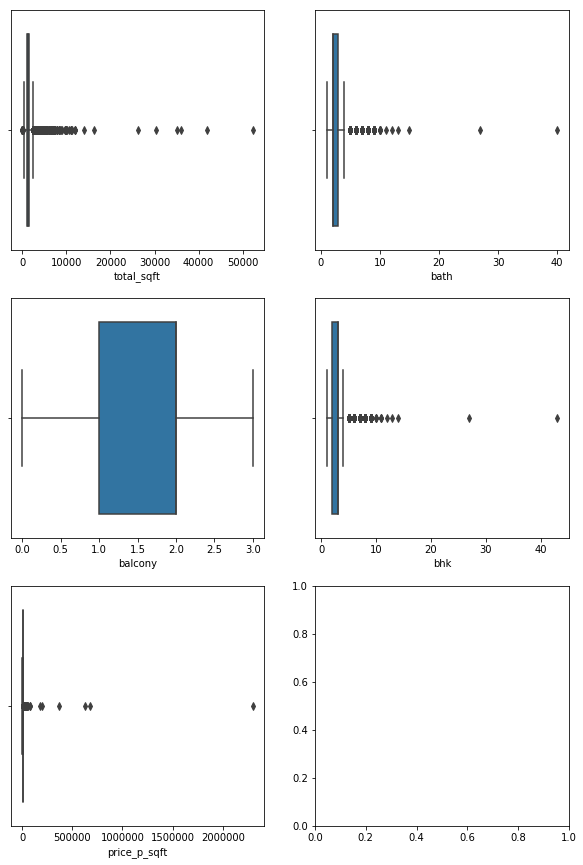

In [189]:
figure, axs = plt.subplots(nrows=3,ncols=2,figsize=(10,15))
sns.boxplot(x=df4["total_sqft"], ax=axs[0,0])
sns.boxplot(x=df4["bath"], ax=axs[0,1])
sns.boxplot(x=df4["balcony"], ax=axs[1,0])
sns.boxplot(x=df4["bhk"], ax=axs[1,1])
sns.boxplot(x=df4["price_p_sqft"], ax=axs[2,0])

# Feature Engineering (total_sqft vs bhk) #

In [190]:
#ouliers where total_sqft is less than average (300) per bedroom 
df4[df4["total_sqft"]/df4["bhk"]<300].head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area,price_p_sqft
58,1407.0,4.0,1.0,150.0,6,0,1,0,10660.980810
68,1350.0,7.0,0.0,85.0,8,0,1,0,6296.296296
70,500.0,3.0,2.0,100.0,3,0,1,0,20000.000000
78,460.0,1.0,0.0,22.0,2,0,0,0,4782.608696
89,710.0,6.0,3.0,160.0,6,0,1,0,22535.211268


In [191]:
df4.shape

(12669, 9)

In [192]:
df5 = df4[~(df4["total_sqft"]/df4["bhk"]<300)]
df5.shape

(12014, 9)

In [193]:
df5["price_p_sqft"].describe()

count     12014.000000
mean       6206.013171
std        3985.360132
min         267.829813
25%        4199.413783
50%        5252.990737
75%        6823.433085
max      176470.588235
Name: price_p_sqft, dtype: float64

# Outliers Removal #
### Filtered data within mean and 1 Standard deviation ###

In [194]:
def remove_pps_ouliers(df):
    m = np.mean(df["price_p_sqft"])
    sd = np.std(df["price_p_sqft"])
    reduced_df = df[(df["price_p_sqft"]>(m-sd)) & (df["price_p_sqft"]<=(m+sd))]
    return reduced_df

In [234]:
df6 = remove_pps_ouliers(df5)
df6.head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area,price_p_sqft
0,1056.0,2.0,1.0,39.07,2,0,0,1,3699.810606
1,2600.0,5.0,3.0,120.00,4,0,1,0,4615.384615
2,1440.0,2.0,3.0,62.00,3,0,0,0,4305.555556
3,1521.0,3.0,1.0,95.00,3,0,0,1,6245.890861
4,1200.0,2.0,1.0,51.00,2,0,0,1,4250.000000


In [204]:
def plot_scatter_plot(df):
    plt.scatter(df[df["bhk"]==1]["total_sqft"],df[df["bhk"]==1]["price"], label="1 BHK", color = "blue", s=50, marker="o")
    plt.scatter(df[df["bhk"]==2]["total_sqft"],df[df["bhk"]==2]["price"], label="2 BHK", color = "green", s=50)
    plt.scatter(df[df["bhk"]==3]["total_sqft"],df[df["bhk"]==3]["price"], label="3 BHK", color = "red", s=50, marker="+")
    plt.scatter(df[df["bhk"]==4]["total_sqft"],df[df["bhk"]==4]["price"], label="3 BHK", color = "purple", s=50, marker="*")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.legend()

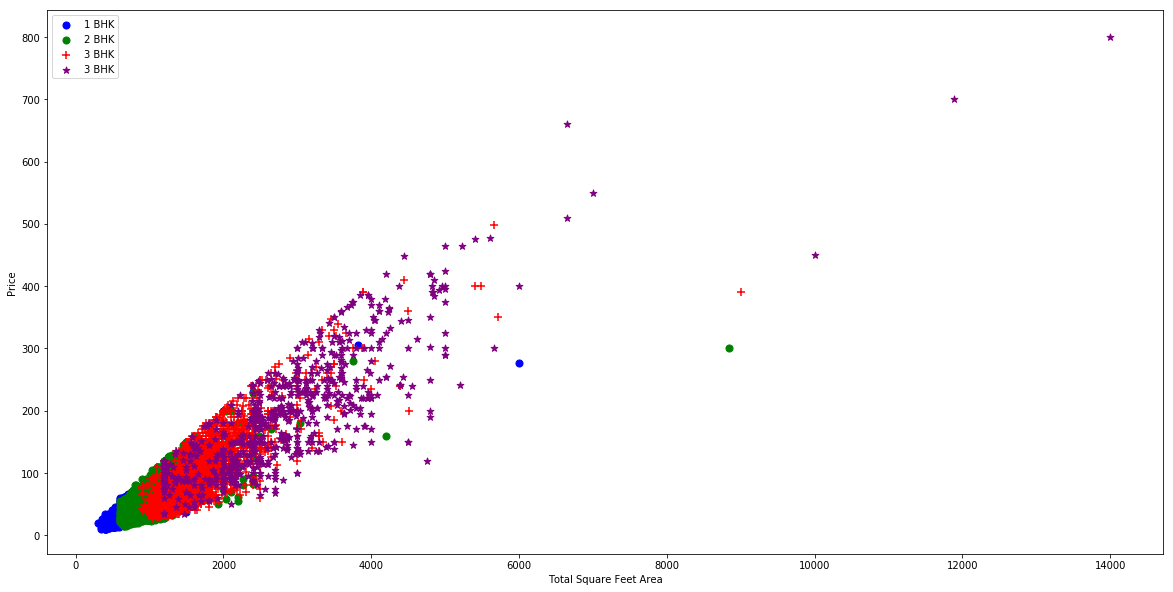

In [205]:
plot_scatter_plot(df6)

### Filtered data for price of ith bhk > mean(ith bhk-1) ###

In [198]:
#remove bhk outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    bhk_stats = {}
    for bhk, bhk_df in df.groupby("bhk"):
        bhk_stats[bhk] = {
            "mean":np.mean(bhk_df["price_p_sqft"]),
            "std": np.std(bhk_df["price_p_sqft"]),
            "count": bhk_df.shape[0]
        }
    for bhk, bhk_df in df.groupby("bhk"):
        stats = bhk_stats.get(bhk-1)
        if stats and stats["count"]>5:
            exclude_indices = np.append(exclude_indices,bhk_df[bhk_df["price_p_sqft"]<(stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")
        

In [199]:
df7 = remove_bhk_outliers(df6)

In [200]:
df7.shape

(5705, 9)

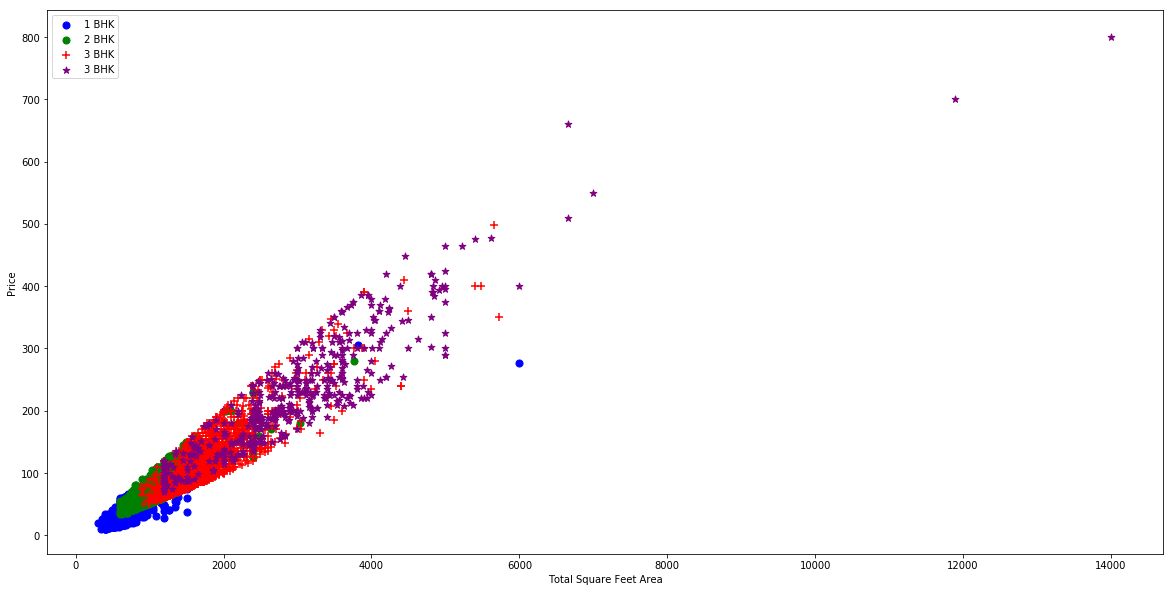

In [206]:
plot_scatter_plot(df7)

In [211]:
df8 = df7[~(df7["bath"]>df7["bhk"]+2)]
df8.head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area,price_p_sqft
3,1521.0,3.0,1.0,95.0,3,0,0,1,6245.890861
14,2250.0,3.0,2.0,148.0,3,0,1,0,6577.777778
15,1175.0,2.0,2.0,73.5,2,0,0,1,6255.319149
20,600.0,1.0,1.0,15.0,1,0,0,0,2500.000000
21,1755.0,3.0,1.0,122.0,3,0,0,1,6951.566952


In [212]:
df9 = df8.drop(["price_p_sqft"], axis=1)
df9.head()

,total_sqft,bath,balcony,price,bhk,Carpet Area,Plot Area,Super built-up Area
3,1521.0,3.0,1.0,95.0,3,0,0,1
14,2250.0,3.0,2.0,148.0,3,0,1,0
15,1175.0,2.0,2.0,73.5,2,0,0,1
20,600.0,1.0,1.0,15.0,1,0,0,0
21,1755.0,3.0,1.0,122.0,3,0,0,1


# Linear Regression (Machine Learning) #

In [215]:
X = df9.drop("price", axis=1)
y = df9["price"]

In [217]:
X.head()

,total_sqft,bath,balcony,bhk,Carpet Area,Plot Area,Super built-up Area
3,1521.0,3.0,1.0,3,0,0,1
14,2250.0,3.0,2.0,3,0,1,0
15,1175.0,2.0,2.0,2,0,0,1
20,600.0,1.0,1.0,1,0,0,0
21,1755.0,3.0,1.0,3,0,0,1


In [218]:
y.head()

3      95.0
14    148.0
15     73.5
20     15.0
21    122.0
Name: price, dtype: float64

In [219]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [253]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)
lr_model.predict(X_test[0:3])
X_test.iloc[0]

total_sqft              1350.0
bath                       2.0
balcony                    0.0
bhk                        3.0
Carpet  Area               0.0
Plot  Area                 0.0
Super built-up  Area       0.0
Name: 3369, dtype: float64

## K Fold cross validation to measure accuracy of our LinearRegression model ##

In [236]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89665896, 0.86253034, 0.88581541, 0.89738014, 0.87356338])

# Grid Search CV

In [237]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.883190,{'normalize': False}
1,lasso,0.881475,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.824288,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use LR model

In [265]:
def predict_price(sqft,bath,balcony,bhk,area):
    x = [None]*7
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    
    if area == "Built-up":
        x[4]=0
        x[5]=0
        x[6]=0
        
        print(lr_model.predict([x]))
    elif area == "Carpet":
        x[4]=1
        x[5]=0
        x[6]=0
        
        print(lr_model.predict([x]))
        
    elif area == "Plot":
        x[4]=0
        x[5]=1
        x[6]=0
        
        print(lr_model.predict([x]))
        
    elif area == "Super":
        x[4]=0
        x[5]=0
        x[6]=1
        
        print(lr_model.predict([x]))

In [267]:
predict_price(1175.0,2.0,2.0,2,"Super")

[72.18402196]


### Save Linear Regression model as Pickle file

In [269]:
import pickle
with open("home_prices_model.pickle",'wb') as f:
    pickle.dump(lr_model,f)

In [273]:
import json
col = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(col))